# Results for the working memory dataset

In [2]:
import os
import numpy as np
import seaborn as sns # for plots
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats as sps # to calcualte confidence intervals, etc
from adjustText import adjust_text # to adjust the text labels in the plots (pip install adjustText)

from selective_recruitment import plotting

from statsmodels.stats.anova import AnovaRM # perform F test

In [3]:
# setting directories
base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
conn_dir = '/Volumes/diedrichsen_data$/data/Cerebellum/connectivity'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'
    conn_dir = '/srv/diedrichsen/data/Cerebellum/connectivity'
atlas_dir = base_dir + '/Atlases'

<font color = 'grey'>Defining functions specific to this dataset

## 1. Plots and test results
investigating linearity

### 1.1 Over the whole cerebellum and cortex

<font color = 'grey'>Prepare the dataframe for the scatterplot

In [23]:
# load the dataframe for the whole 
df_path = os.path.join(conn_dir, "WMFS", "sc_WMFS_ses-02_whole.tsv")
df = pd.read_csv(df_path, sep="\t")

# cleaning up dataframe
df["phase"] = df["phase"].map({0:'encode', 1:'retriev'})
df["load"] = df["load"].map({2:'load2', 4:'load4', 6:'load6'})
df["recall"] = df["recall"].map({1:"forward", 0:"backward"})

# prepare df for plotting
# by setting non-numeric fields to 'first', we make sure that they are not removed from the final dataframe
agg_kw= {'load': 'first', 'recall':'first', 'phase': 'first', 'cond_name':'first', 'X': np.mean, 'Y': np.mean, 'res': np.mean}
df_preped = plotting.prep_df(df, groupby = "cond_name", agg_kw=agg_kw)

# print(np.sum(df['res']))
    

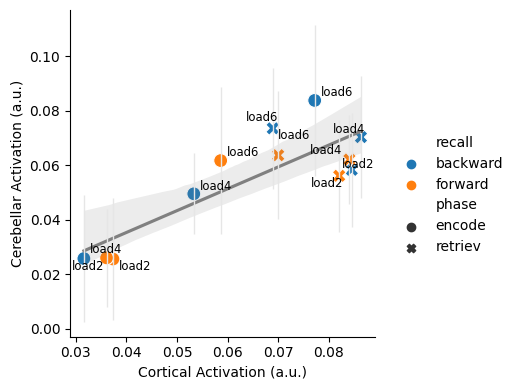

In [24]:
plotting.make_scatterplot(df_preped, hue = "recall", style="phase", label = 'load', height = 4, aspect = 1)
plt.savefig("SC_WM_WHOLE.svg")

Figure 1. Scatterplot showing average cerebellar activation in each condition vs the corresponding average activation in the cortex. The linear fit is shown in grey. Error bars represent the standard deviation of the residuals of the linear regression fit. 

<font color = 'grey'> Do F-test (repeated measures ANOVA)

In [25]:
# need to pass on aggregate_func to aggregate over the two halved (see half column in the original dataframe)
print(AnovaRM(data=df, depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

                  Anova
          F Value  Num DF  Den DF  Pr > F
-----------------------------------------
cond_name  6.4810 11.0000 165.0000 0.0000



### 1.2 Over region of interests
#### 1.2.1 verbal working memory contrast

<font color = 'grey'>Prepare the dataframe for the scatterplot

In [26]:
# load the dataframe for the whole 
df_path = os.path.join(conn_dir, "WMFS", "sc_WMFS_ses-02_Verbal2Back.tsv")
df = pd.read_csv(df_path, sep="\t")

# cleaning up dataframe
df["phase"] = df["phase"].map({0:'encode', 1:'retriev'})
df["load"] = df["load"].map({2:'load2', 4:'load4', 6:'load6'})
df["recall"] = df["recall"].map({1:"forward", 0:"backward"})

# prepare df for plotting
# by setting non-numeric fields to 'first', we make sure that they are not removed from the final dataframe
agg_kw= {'load': 'first', 'recall':'first', 'phase': 'first', 'cond_name':'first', 'X': np.mean, 'Y': np.mean, 'res': np.mean}
df_preped = plotting.prep_df(df, groupby = "cond_name", agg_kw=agg_kw)


# print(np.sum(df['res']))

<font color = 'grey'> Do the scatterplot:<br>

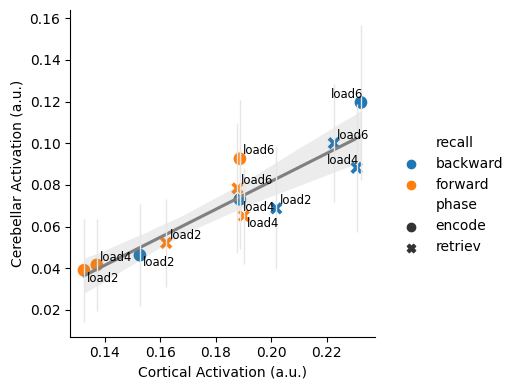

In [27]:
plotting.make_scatterplot(df_preped, hue = "recall", style="phase", label = 'load', height = 4, aspect = 1)
plt.savefig("SC_WM_VWM.svg")

Figure 2.

<font color = 'grey'> Do F-test (repeated measures ANOVA)

In [28]:
print(AnovaRM(data=df, depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

                  Anova
          F Value  Num DF  Den DF  Pr > F
-----------------------------------------
cond_name  2.8394 11.0000 165.0000 0.0020



### 1.3 Using connectivity models

<font color = 'grey'> Model trained on MDTB, tested on MDTB:<br>

In [29]:
# load the dataframe for the whole 
df_path = os.path.join(conn_dir, "WMFS", "sc_conn_MDTB_WMFS_ses-02_Verbal2Back.tsv")
df = pd.read_csv(df_path, sep="\t")

# cleaning up dataframe
df["phase"] = df["phase"].map({0:'encode', 1:'retriev'})
df["load"] = df["load"].map({2:'load2', 4:'load4', 6:'load6'})
df["recall"] = df["recall"].map({1:"forward", 0:"backward"})

# prepare df for plotting
# by setting non-numeric fields to 'first', we make sure that they are not removed from the final dataframe
agg_kw= {'load': 'first', 'recall':'first', 'phase': 'first', 'cond_name':'first', 'X': np.mean, 'Y': np.mean, 'res': np.mean}
df_preped = plotting.prep_df(df, groupby = "cond_name", agg_kw=agg_kw)


# print(np.sum(df['res']))

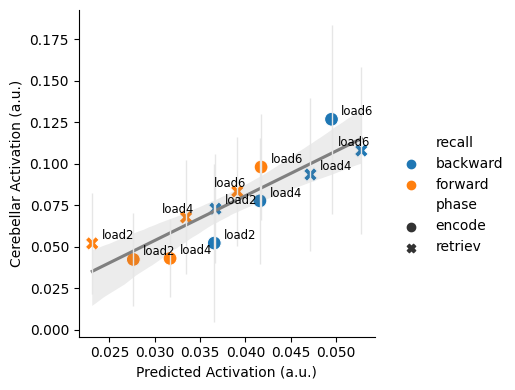

In [30]:
plotting.make_scatterplot(df_preped, hue = "recall", style="phase", label = 'load', height = 4, aspect = 1)
plt.xlabel("Predicted Activation (a.u.)")
plt.savefig("SC_demand_conn_VWM.svg")

In [31]:
print(AnovaRM(data=df, depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

                  Anova
          F Value  Num DF  Den DF  Pr > F
-----------------------------------------
cond_name  1.4400 11.0000 165.0000 0.1594

